<a href="https://colab.research.google.com/github/amanullahshah32/Machine-Learning/blob/main/Machine_Learning_Project_Approaces/Rossmann_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install opendatasets --upgrade --quiet

In [3]:
import os
#import jovian
import matplotlib
#import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
#od.download('https://www.kaggle.com/competitions/rossmann-store-sales/')

In [5]:
#os.listdir('rossmann-store-sales')

In [6]:
ross_df = pd.read_csv("/content/drive/MyDrive/Datasets/rossmann-store-sales/train.csv")

<ipython-input-6-fcfc1b210f12>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv("/content/drive/MyDrive/Datasets/rossmann-store-sales/train.csv")


In [7]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
store_df = pd.read_csv("/content/drive/MyDrive/Datasets/rossmann-store-sales/store.csv")

In [9]:
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/rossmann-store-sales/test.csv")

In [10]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [12]:
ross_df.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

merge two dataframe to get a richer set of feature for each row of training sets

In [13]:
merged_df = ross_df.merge(store_df, on='Store')

In [14]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [15]:
merged_df.shape

(1017209, 18)

In [16]:
merged_test_df = test_df.merge(store_df, on='Store')

In [17]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41084,38520,1115,2,2015-08-04,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41085,39376,1115,1,2015-08-03,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41086,40232,1115,7,2015-08-02,0.0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [18]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [19]:
test_df.shape

(41088, 8)

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [21]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [23]:
round(merged_df.describe())

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1014567.0,693861.0,693861.0,1017209.0,509178.0,509178.0
mean,558.0,4.0,5774.0,633.0,1.0,0.0,0.0,5430.0,7.0,2009.0,1.0,23.0,2012.0
std,322.0,2.0,3850.0,464.0,0.0,0.0,0.0,7715.0,3.0,6.0,0.0,14.0,2.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,1900.0,0.0,1.0,2009.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0,710.0,4.0,2006.0,0.0,13.0,2011.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0,2330.0,8.0,2010.0,1.0,22.0,2012.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0,6890.0,10.0,2013.0,1.0,37.0,2013.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0,75860.0,12.0,2015.0,1.0,50.0,2015.0


In [24]:
merged_df.duplicated().sum()

0

In [25]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [26]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [27]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [28]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Exploratory Data Analysis and Visualization

In [29]:
### lets study the distribution of the target cols

<Axes: xlabel='Sales', ylabel='Count'>

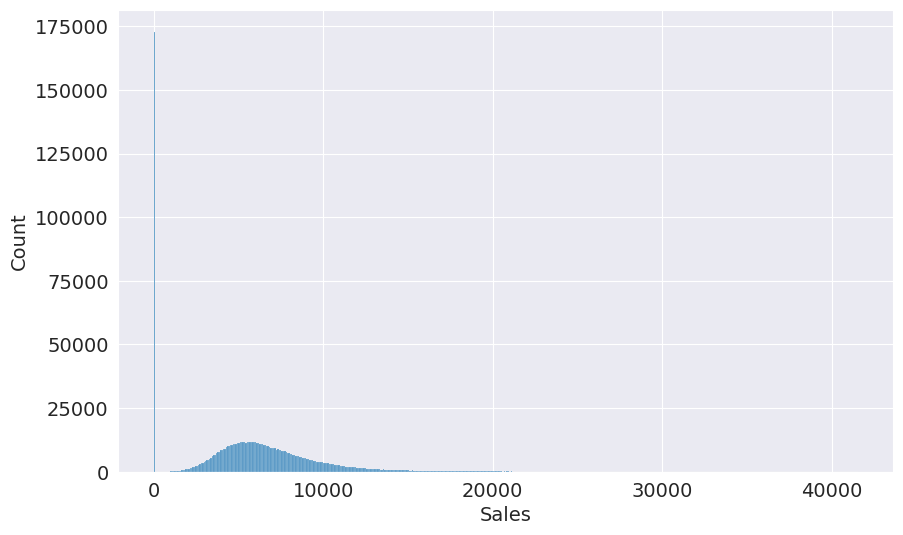

In [30]:
sns.histplot(data=merged_df, x='Sales')

In [31]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [32]:
merged_df.Sales.value_counts()[0]

172871

In [33]:
merged_df = merged_df[merged_df.Open==1].copy()

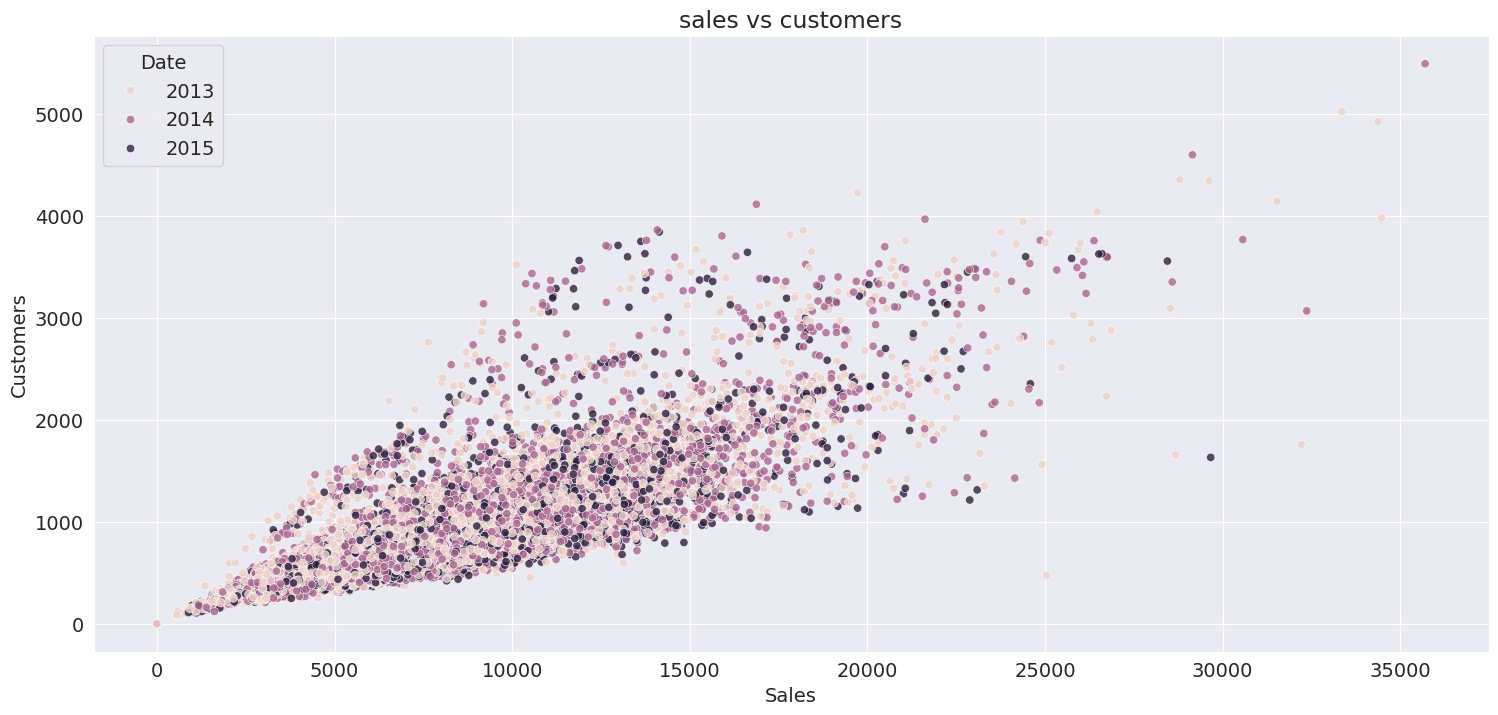

In [34]:
plt.figure(figsize = (18,8))

temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y= temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title('sales vs customers')
plt.show()

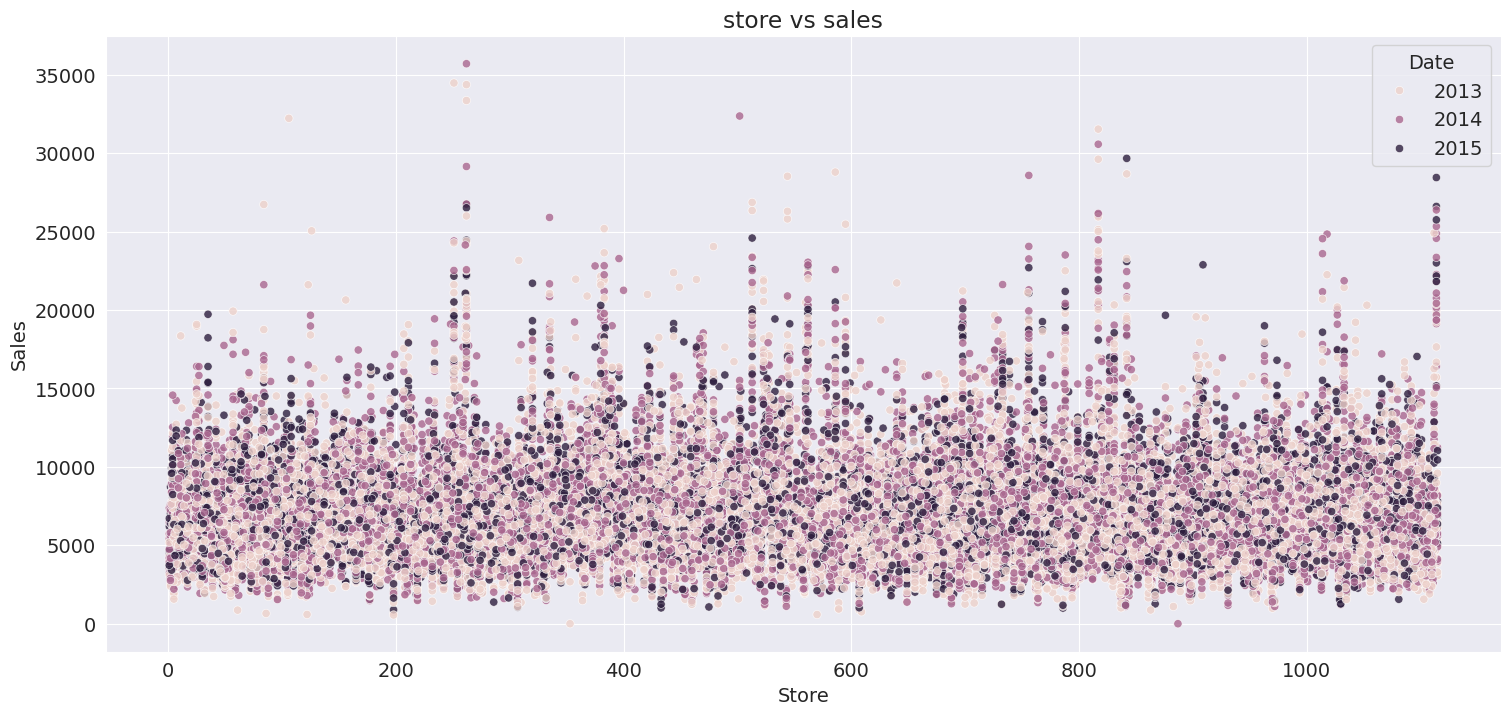

In [35]:
plt.figure (figsize = (18,8))
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue= temp_df.Date.dt.year, alpha = 0.8)
plt.title('store vs sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

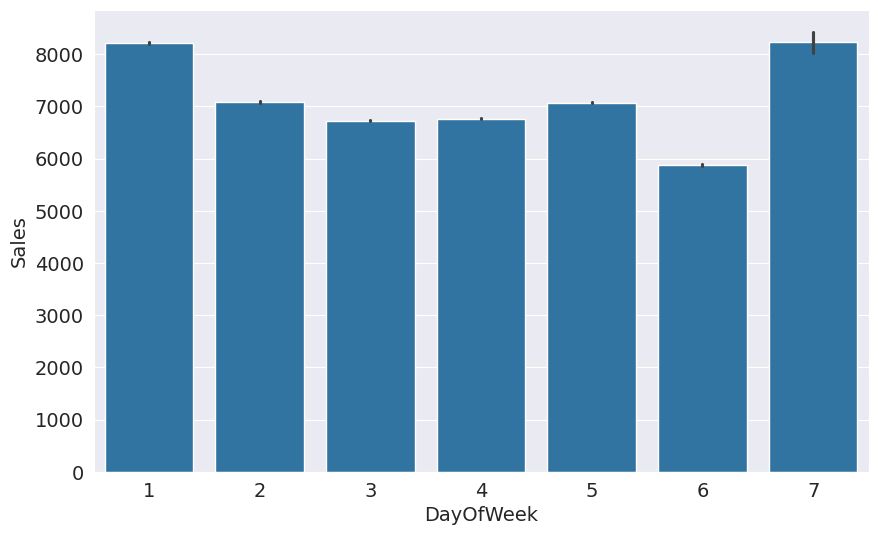

In [36]:
sns.barplot(data = merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

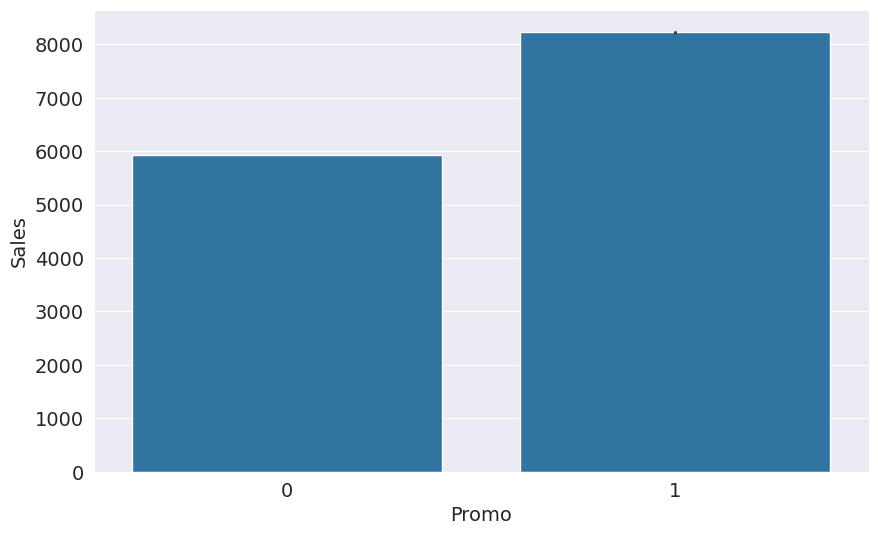

In [37]:
sns.barplot(data = merged_df, x='Promo', y = 'Sales')

### correlation

In [38]:
corr_df = merged_df[merged_df.select_dtypes(exclude=['object']).columns.tolist()]

In [39]:
corr_df.corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
Date                         0.062757
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

In [40]:
# sns.scatterplot(data = merged_df, x='Promo', y = 'Sales')
# plt.title('promo vs sales')
# plt.show()

In [41]:
# sns.scatterplot(data = merged_df, x='Promo', y = 'Sales', hue=merged_df.Date.dt.year, alpha = 0.8)
# plt.title('promo vs sales')
# plt.show()

## Feature ENgineering

In [42]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [43]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Month', ylabel='Sales'>

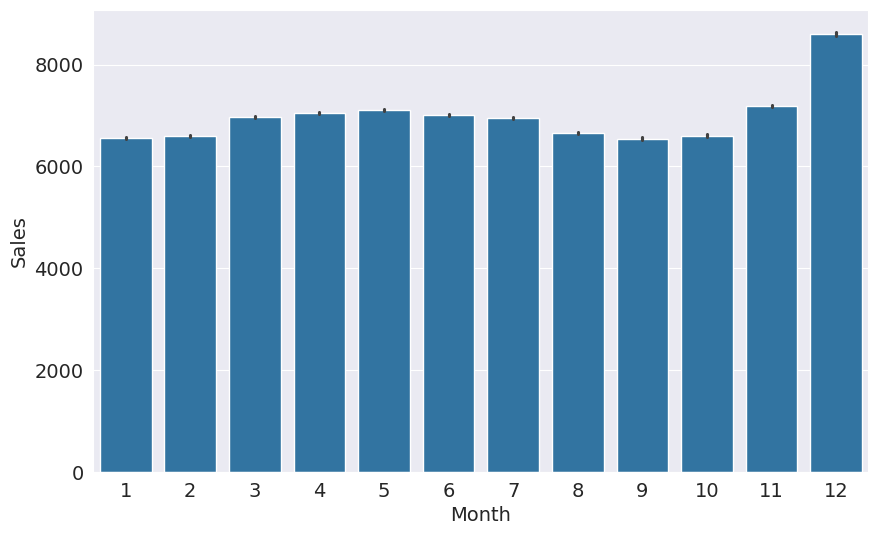

In [44]:
sns.barplot(data=merged_df, x='Month', y='Sales')

In [45]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,30,7,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,29,7,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,28,7,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,27,7,2015


## train, test, val split

In [46]:
len(merged_df)

844392

In [47]:
train_size = int(.75 * len(merged_df))

In [48]:
sorted_df = merged_df.sort_values('Date')
train_df , val_df = sorted_df[:train_size], sorted_df[train_size: ]

In [49]:
len(train_df), len(val_df)

(633294, 211098)

In [50]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [51]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [52]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [53]:
#train_df

## input and target cols

In [54]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [55]:
input_cols = []

all_cols = train_df.columns
# loop through all columns

for col in all_cols:
  if col != 'Sales':
    input_cols.append(col)


In [56]:
#input_cols

In [57]:
## making target cols using for for loop:

target_col = 'Sales'

# for all_cols in input_cols:
#   if all_cols != input_cols:
#     target_col.append(all_cols)

In [58]:
#target_col

In [59]:
# for col in merged_df.columns:
#    #print(f"unique values in each column '{col}': ")
#    print(merged_df[col].unique())
#   # print()

In [60]:
# # Set a threshold for the maximum number of unique values to print
# max_unique_values = 10

# # Iterate over each column
# for col in merged_df.columns:
#     # Get the number of unique values in the column
#     num_unique = merged_df[col].nunique()
#     # Print unique values only if the number of unique values is reasonable
#     if num_unique <= max_unique_values:
#         # Print the column name
#         print(f"Unique values in column '{col}':")
#         # Print the unique values in the column
#         print(merged_df[col].unique())
#         print()  # Add a newline for better readability
#     else:
#         # Print a message indicating that there are too many unique values
#         print(f"Too many unique values in column '{col}' ({num_unique} unique values).")
#         print()  # Add a newline for better readability


In [61]:
## seeing the total number of unique values in all columns:
merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
Day                             31
Month                           12
Year                             3
dtype: int64

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633294 entries, 615999 to 637347
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      633294 non-null  int64         
 1   DayOfWeek                  633294 non-null  int64         
 2   Date                       633294 non-null  datetime64[ns]
 3   Sales                      633294 non-null  int64         
 4   Customers                  633294 non-null  int64         
 5   Open                       633294 non-null  int64         
 6   Promo                      633294 non-null  int64         
 7   StateHoliday               633294 non-null  object        
 8   SchoolHoliday              633294 non-null  int64         
 9   StoreType                  633294 non-null  object        
 10  Assortment                 633294 non-null  object        
 11  CompetitionDistance        631666 non-null  float64 

In [63]:
merged_df[target_col].dtypes


dtype('int64')

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range.

In [64]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy=)